<a href="https://colab.research.google.com/github/chakrie1489/Data-Narratives/blob/main/Data_Narrative_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Set-1
###Question 1

What is the probability distribution of average salary for the full time professors in all type of colleges?

<ipython-input-84-cfb183d93cfb>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type_I["Average salary - full professors"], label="Type I", shade=True)
<ipython-input-84-cfb183d93cfb>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type_IIA["Average salary - full professors"], label="Type IIA", shade=True)
<ipython-input-84-cfb183d93cfb>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(type_IIB["Average salary - full professors"], label="Type IIB", shade=True)


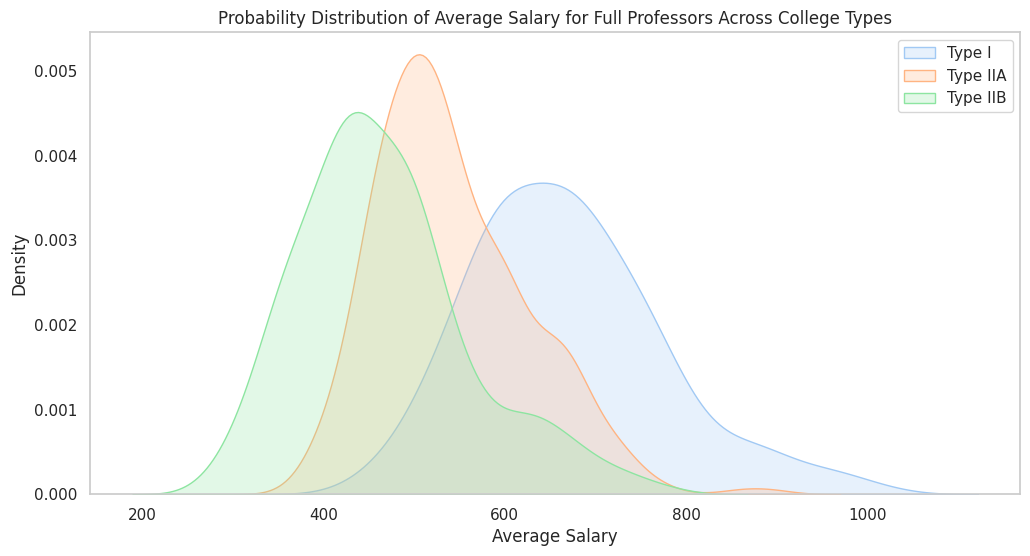

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("aaup.xlsx")
data['Average salary - full professors'] = pd.to_numeric(data['Average salary - full professors'], errors='coerce')
type_I = data[data["Type (I, IIA, or IIB)"] == "I"]
type_IIA = data[data["Type (I, IIA, or IIB)"] == "IIA"]
type_IIB = data[data["Type (I, IIA, or IIB)"] == "IIB"]
plt.figure(figsize=(12, 6))
sns.kdeplot(type_I["Average salary - full professors"], label="Type I", shade=True)
sns.kdeplot(type_IIA["Average salary - full professors"], label="Type IIA", shade=True)
sns.kdeplot(type_IIB["Average salary - full professors"], label="Type IIB", shade=True)
plt.title("Probability Distribution of Average Salary for Full Professors Across College Types")
plt.xlabel("Average Salary")
plt.ylabel("Density")
plt.legend()
plt.show()

###Question 2

what is the covariance between the average salary of associate professors and the average salary of full professors in colleges located in Illinois and Indiana?

covariance : 7509.95


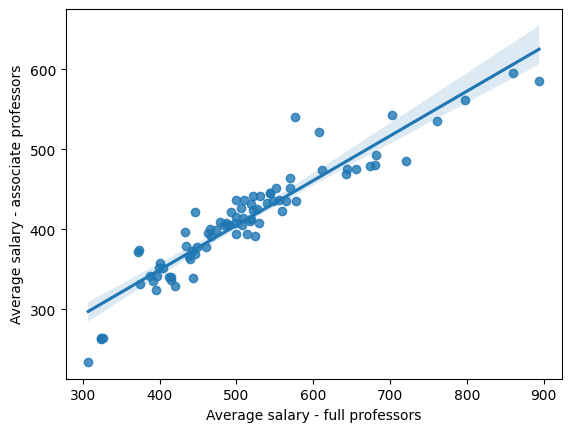

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('aaup.xlsx')
df = df[df['State (postal code)'].isin(['IL', 'IN'])]
covariance = df[['Average salary - full professors', 'Average salary - associate professors']].cov().iloc[0,1]
print(f'covariance : {covariance:.2f}')

sns.regplot(x='Average salary - full professors', y='Average salary - associate professors', data=df)
plt.show()

###Question 3

 What is the probability that a randomly selected college from the dataset is of type IIA or IIB?

The probability that a randomly selected college from the dataset is of type IIA or IIB is 0.84


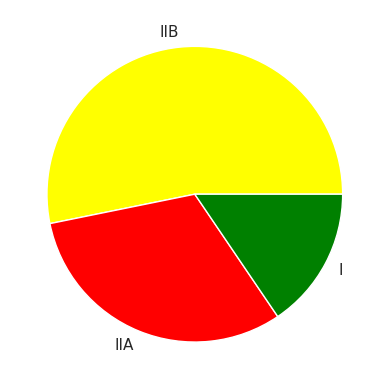

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('aaup.xlsx')
df_IIA_IIB = df[df['Type (I, IIA, or IIB)'].isin(['IIA', 'IIB'])]
prob = df_IIA_IIB.shape[0] / df.shape[0]
print(f'The probability that a randomly selected college from the dataset is of type IIA or IIB is {prob:.2f}')

df = df[df['Type (I, IIA, or IIB)'].isin(['I', 'IIA', 'IIB'])]
counts = df['Type (I, IIA, or IIB)'].value_counts()
colors = ['yellow', 'red', 'green']
plt.pie(counts, labels=counts.index,colors=colors)
plt.show()

###Question4

What is the probability that a randomly selected Type I college has a higher average compensation for assistant professors than the average compensation for assistant professors in Type IIA colleges?

Probability : 0.81


<function matplotlib.pyplot.show(close=None, block=None)>

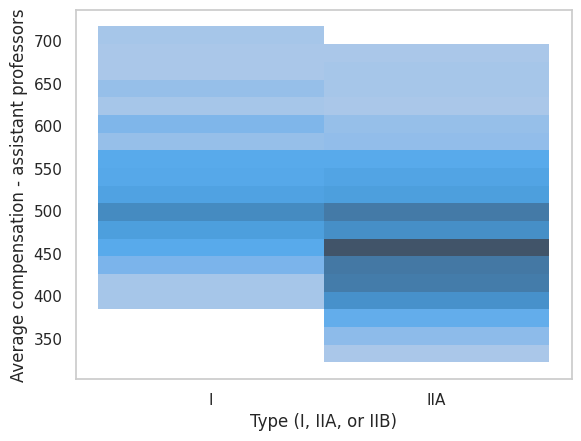

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_excel('aaup.xlsx')
df = df[df['Type (I, IIA, or IIB)'].isin(['I', 'IIA'])]
avg_comp_IIA = df[df['Type (I, IIA, or IIB)'] == 'IIA']['Average compensation - assistant professors'].mean()
prob = (df[(df['Type (I, IIA, or IIB)'] == 'I') & (df['Average compensation - assistant professors'] > avg_comp_IIA)].shape[0] / df[df['Type (I, IIA, or IIB)'] == 'I'].shape[0])
print(f'Probability : {prob:.2f}')

sns.histplot(x='Type (I, IIA, or IIB)', y='Average compensation - assistant professors', data=df)
plt.show

###Question5

What is the probabilty that the average salary of associate professors is greater than 350 in the colleges of arizona state?

The probability that the average salary of associate professors is greater than 350 in colleges located in Arizona is 0.75


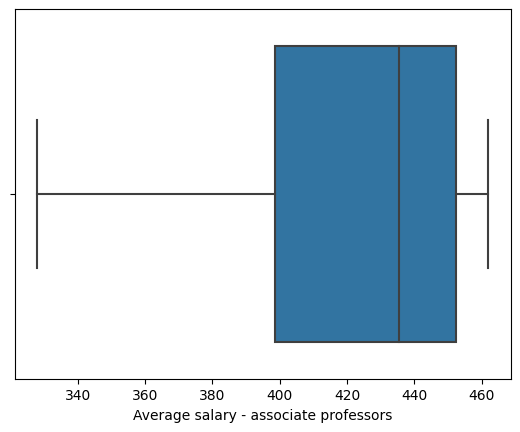

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('aaup.xlsx')
df = df[df['State (postal code)'] == 'AZ']
probability = (df['Average salary - associate professors'] > 350).mean()
print(f'The probability that the average salary of associate professors is greater than 350 in colleges located in Arizona is {probability:.2f}')

sns.boxplot(data=df, x='Average salary - associate professors')
plt.show()

#Data Set-2
###Question 1

What is the probability distribution of the average MAT scores of students in both public and private sectors in Alabama and Arizona?

<ipython-input-17-637acccd9dcb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=AL_AR_public['Average Math SAT score'], label='Public Sector',shade=True)
<ipython-input-17-637acccd9dcb>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=AL_AR_private['Average Math SAT score'], label='Private Sector',shade=True)


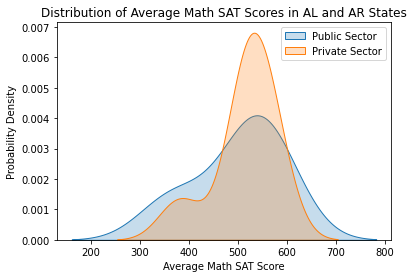

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_excel("usnews.xlsx")
AL_AR_public = df[((df['State (postal code)'] == 'AL') | (df['State (postal code)'] == 'AR')) & (df['Public/private indicator (public=1, private=2)'] == 1)]
AL_AR_private = df[((df['State (postal code)'] == 'AL') | (df['State (postal code)'] == 'AR')) & (df['Public/private indicator (public=1, private=2)'] == 2)]
sns.kdeplot(data=AL_AR_public['Average Math SAT score'], label='Public Sector',shade=True)
sns.kdeplot(data=AL_AR_private['Average Math SAT score'], label='Private Sector',shade=True)
plt.title('Distribution of Average Math SAT Scores in AL and AR States')
plt.xlabel('Average Math SAT Score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
From the KDE plot, we can see that the distribution of Average Math SAT scores is slightly higher in the private sector than in the public sector in both AL and AR states.

###Question 2

What is the probability that the room costs in private sector colleges is greater than the room costs in public sector colleges?

The probability that the room costs in private sector is greater than the average room costs in public sector is 0.44


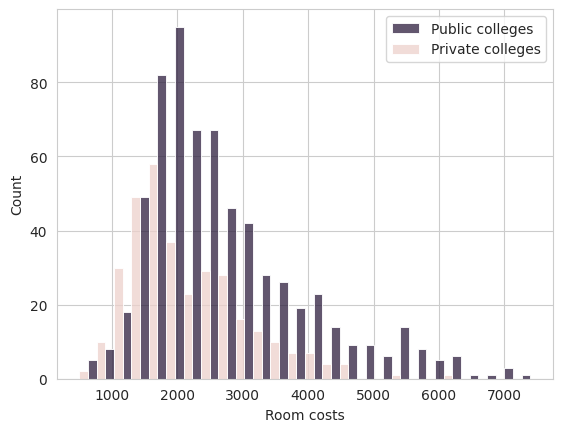

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("usnews.xlsx")
private_room_costs = data[data['Public/private indicator (public=1, private=2)'] == 2]['Room costs']
public_room_costs = data[data['Public/private indicator (public=1, private=2)'] == 1]['Room costs']
probability = (private_room_costs > public_room_costs.mean()).mean()
print(f'The probability that the room costs in private sector is greater than the average room costs in public sector is {probability:.2f}')

sns.set_style('whitegrid')
sns.histplot(data=data, x='Room costs', hue='Public/private indicator (public=1, private=2)', multiple='dodge')
plt.legend(['Public colleges','Private colleges'])
plt.show()

###Question 3

Which state has the most number of public sector universities with student/faculty ratio greater than 15?

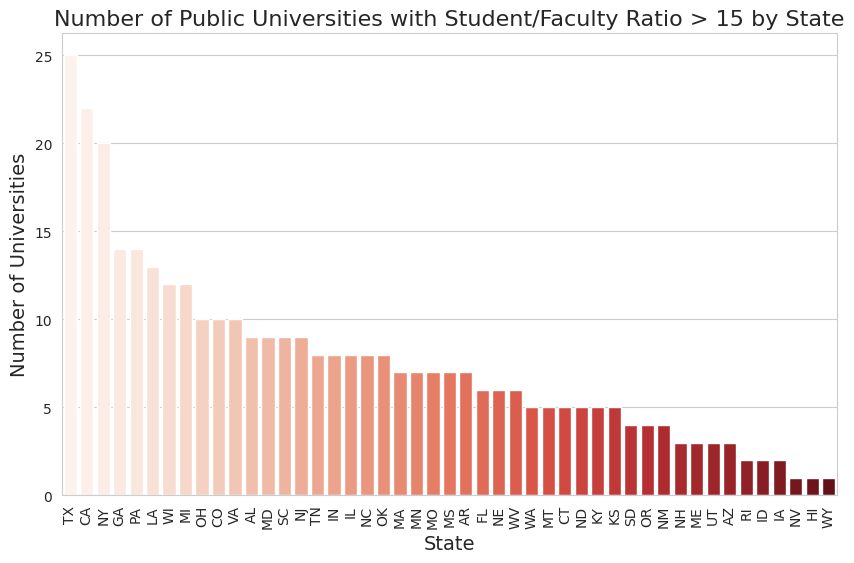

The state with the most number of public sector universities with student/faculty ratio greater than 15 is TX with 25 universities.


In [ ]:
import pandas as pd
import seaborn as sns


df = pd.read_excel('usnews.xlsx')
df = df[df['Student/faculty ratio'].notnull()]
filtered_df = df[(df['Public/private indicator (public=1, private=2)'] == 1) & (df['Student/faculty ratio'] > 15)]
state_counts = filtered_df.groupby('State (postal code)')['College name'].count()

max_state = state_counts.idxmax()
max_count = state_counts[max_state]
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
palette = sns.color_palette('Reds', len(state_counts))
sns.countplot(data=filtered_df, x='State (postal code)', order=state_counts.sort_values(ascending=False).index, palette=palette, ax=ax)
ax.set_title('Number of Public Universities with Student/Faculty Ratio > 15 by State', fontsize=16)
ax.set_xlabel('State', fontsize=14)
ax.set_ylabel('Number of Universities', fontsize=14)
plt.xticks(rotation=90)
plt.show()

print(f'The state with the most number of public sector universities with student/faculty ratio greater than 15 is {max_state} with {max_count} universities.')

###Question 4

Which state’s universities have better average MAT and SAT scores?

The state with the highest average Math SAT score is IL with a score of 555.25
The state with the highest average Verbal SAT score is IL with a score of 503.12


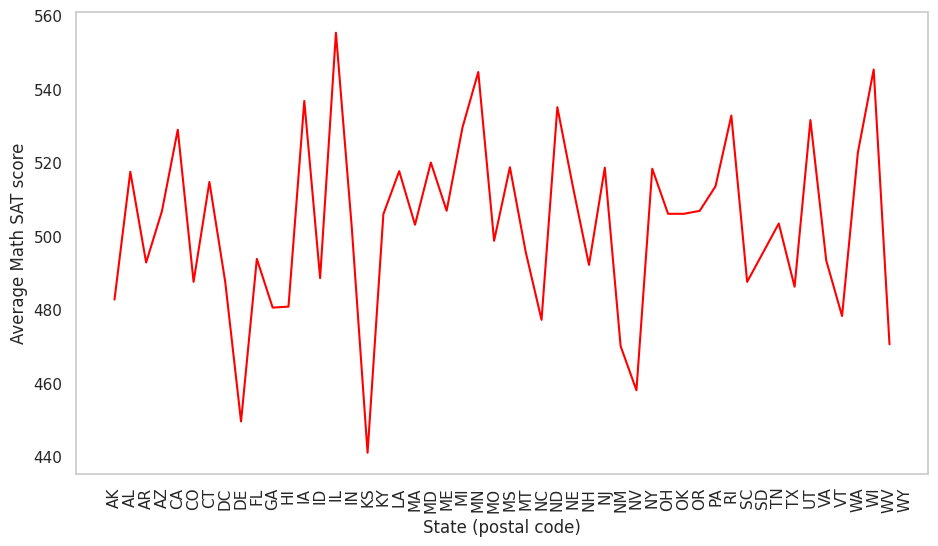

In [ ]:
import seaborn as sns
import pandas as pd

data = pd.read_excel('usnews.xlsx')
state_means = data.groupby('State (postal code)')[['Average Math SAT score', 'Average Verbal SAT score']].mean()
max_math_state = state_means['Average Math SAT score'].idxmax()
max_math_score = state_means.loc[max_math_state, 'Average Math SAT score']
max_verbal_state = state_means['Average Verbal SAT score'].idxmax()
max_verbal_score = state_means.loc[max_verbal_state, 'Average Verbal SAT score']
print(f'The state with the highest average Math SAT score is {max_math_state} with a score of {max_math_score:.2f}')
print(f'The state with the highest average Verbal SAT score is {max_verbal_state} with a score of {max_verbal_score:.2f}')

plt.figure(figsize=(11, 6))
sns.lineplot(data=state_means.reset_index(), x='State (postal code)', y='Average Math SAT score',color='red')
plt.xticks(rotation=90)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

###Question 5

In which of the following states is the probability of getting accepted into universities higher: California, Alabama, Florida or Georgia?

<ipython-input-47-a5ebd9a89020>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Acceptance Rate'] = filtered_data['Number of applicants accepted'] / filtered_data['Number of applications received']


State (postal code)
AL    0.767210
CA    0.675506
FL    0.713595
GA    0.708093
Name: Acceptance Rate, dtype: float64


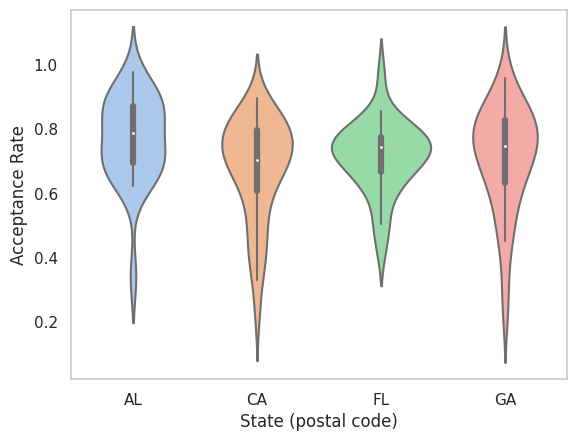

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('usnews.xlsx')
states = ['CA', 'AL', 'FL', 'GA']
filtered_data = data[data['State (postal code)'].isin(states)]
filtered_data['Acceptance Rate'] = filtered_data['Number of applicants accepted'] / filtered_data['Number of applications received']
state_means = filtered_data.groupby('State (postal code)')['Acceptance Rate'].mean()
print(state_means)
sns.violinplot(data=filtered_data, x='State (postal code)', y='Acceptance Rate')
plt.show()